# Network-In-Network Model for CIFAR-10

In [2]:
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau


# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocess the data
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

def create_keras_model():
    model = keras.Sequential()

    model.add(layers.Conv2D(192, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(160, kernel_size=1, strides=1, padding='valid', activation='relu'))
    model.add(layers.Conv2D(96, kernel_size=1, strides=1, padding='valid', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=3, strides=2, padding='same'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2D(192, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(layers.Conv2D(192, kernel_size=1, strides=1, padding='valid', activation='relu'))
    model.add(layers.Conv2D(192, kernel_size=1, strides=1, padding='valid', activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=3, strides=2, padding='same'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2D(192, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(layers.Conv2D(192, kernel_size=1, strides=1, padding='valid', activation='relu'))
    model.add(layers.Conv2D(10, kernel_size=1, strides=1, padding='valid', activation='relu'))
    model.add(layers.GlobalAveragePooling2D())

    return model

# Create the Keras model
model = create_keras_model()

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, clipvalue=1.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a learning rate reduction callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor the validation loss
    factor=0.5,          # Reduce the learning rate by a factor of 0.5
    patience=3,          # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-7,         # Minimum learning rate
    verbose=1            # Display a message when the learning rate is reduced
)


# Training the model for 10 epochs
history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels),callbacks=[reduce_lr])

Epoch 1/100
1563/1563 [==============================] - 29s 17ms/step - loss: 2.2262 - accuracy: 0.1457 - val_loss: 2.0506 - val_accuracy: 0.1903 - lr: 0.0100
Epoch 2/100
1563/1563 [==============================] - 25s 16ms/step - loss: 2.1832 - accuracy: 0.1627 - val_loss: 2.2869 - val_accuracy: 0.1265 - lr: 0.0100
Epoch 3/100
1563/1563 [==============================] - 25s 16ms/step - loss: 2.1421 - accuracy: 0.1796 - val_loss: 1.9478 - val_accuracy: 0.2556 - lr: 0.0100
Epoch 4/100
1563/1563 [==============================] - 25s 16ms/step - loss: 1.9706 - accuracy: 0.2440 - val_loss: 1.9709 - val_accuracy: 0.2337 - lr: 0.0100
Epoch 5/100
1563/1563 [==============================] - 25s 16ms/step - loss: 1.9760 - accuracy: 0.2511 - val_loss: 2.1846 - val_accuracy: 0.1925 - lr: 0.0100
Epoch 6/100
1563/1563 [==============================] - 26s 16ms/step - loss: 1.8594 - accuracy: 0.2996 - val_loss: 1.8056 - val_accuracy: 0.3273 - lr: 0.0100
Epoch 7/100
1563/1563 [=================

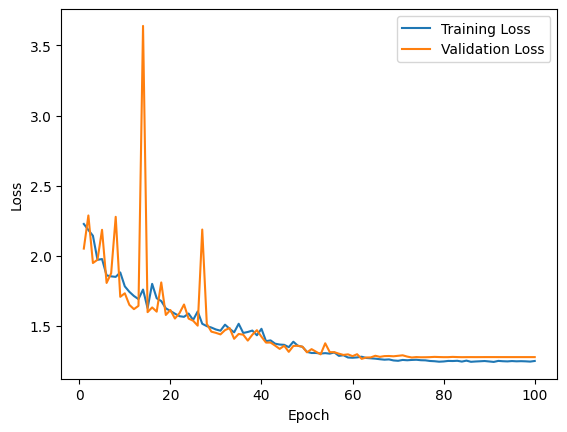

In [4]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(range(1,101),history.history['loss'], label='Training Loss')
plt.plot(range(1,101),history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

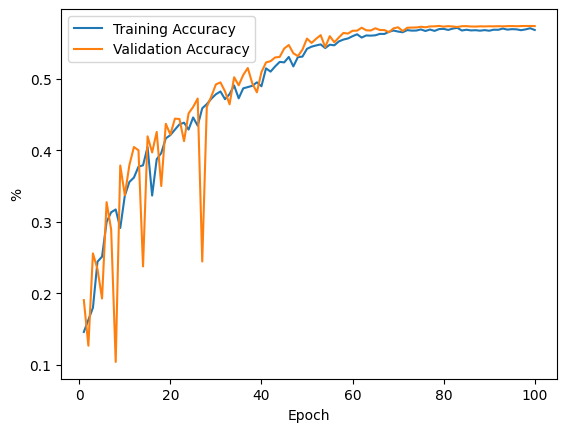

In [5]:
# Plot the acc
plt.plot(range(1,101),history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1,101),history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('%')
plt.legend()
plt.show()

In [8]:
model.save("../Models/CIFAR-10/CIFAR_NIN.karas")

# LeNet-5 Model for CIFAR-10

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical  # Add this import

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocess the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Build the modified LeNet-5 model for CIFAR-10
model = models.Sequential()

model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(120, (5, 5), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, clipvalue=1.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a learning rate reduction callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor the validation loss
    factor=0.5,          # Reduce the learning rate by a factor of 0.5
    patience=3,          # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-7,         # Minimum learning rate
    verbose=1            # Display a message when the learning rate is reduced
)
# Training the model for 10 epochs
history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels),callbacks=[reduce_lr])

Epoch 1/100
1202/1563 [======================>.......] - ETA: 7s - loss: 2.1908 - accuracy: 0.1853

KeyboardInterrupt: 